# A realistic dual oscillator model of circadian rhythms
Circadian rhythms are biological oscillations with a period close to 24h, which modulates different physiological and behavioral processes in all the living organisms.In mammals, the circadian clock consists of activators ( _Clock_ and _Bmal1_ ) that activates the repressors ( _per_ and _cry_ ), which in turn, after a delay, suppresses the activity of the activators and thereby inhibiting its own production. A single cell dual morning and evening oscillator was proposed by Daan et al., based on the molecular network that has two sets of similar non-redundant _per1/cry1_ and _per2/cry2_ circadian genes and each can independently maintain their endogenous oscillations.Here I am presenting a minimal mathematical model with the assumption that _per1_ gene acts a morning oscillator and _per2_ gene acts as an evening oscillator. For more details, please read the research article https://doi.org/10.1371/journal.pone.0177197

In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
# Define the time for integration
t=np.linspace(0,7000,700001)

In [4]:
# Set Initial conditions
B=[1,1,1,1,1,1,1,1,1,1,1,1,1]

## ODE Model
The circadian model is based on ordinary differetial equations (ODE).There are overall 13 equations with 60 parameters.We estimate all the parameters for the wild type by genetic algorithms to fit the mRNA’s and proteins got from the experiments.The ODE model with estimated parameters values are gven as:

In [5]:
# Ode equations
def ode_eqn_new_model(B,t):
    Mp1=B[0];P1c=B[1];P1n=B[2];Mp2=B[3];P2c=B[4];P2n=B[5];Mb=B[6]
    B1=B[7];B2=B[8];Mr=B[9];R=B[10];PB=B[11];PB2=B[12]
    
    
    vs1=0.45;vs2=1.2;vs3=4.5;vs4=1.23;vs5=0.1;v1=1.47;v2=0.49
    v3=0.42;v4=0.4;v5=1.38;v6=1.67;v7=4.9;v8=0.37;v9=0.6
    v10=1.51;v11=0.13;kd1=0.11;kd2=0.09;kd3=1.07;kd4=0.03;kd5=0.2;kd6=0.08;kd7=1.34
    kd8=0.49;kd9=0.7;kd10=0.19;kd11=0.92;kd12=0.29;kd13=0.07;k1=0.33;k2=1.7;k3=1.44
    k4=1.65;k5=0.87;k6=1.6;k7=3.57
    kp1=1.33;kp2=0.5;kp3=0.11;kp4=0.2;ka1=0.44;ka2=1.66;ka3=1.48;ka4=1.5
    kI1=6.63;ke1=0.82;ke2=0.98;ke3=0.6;ke4=1.65;ke5=1.13;ke6=1;ke7=0.3;ke8=1.05
    ke9=1.7;ke10=3.58;ke11=0.026
    kx1=0.29;m=2.65;s=4.07;w=5.2;L=0
    
    
    dMp1dt=(vs1)*B2**m/(ka1**m+B2**m)-v1*Mp1/(ke1+Mp1)-kd1*Mp1+L
    dP1cdt=k1*Mp1-v2*P1c/(ke2+P1c)-kd2*P1c
    dP1ndt=k2*P1c-v3*P1n/(ke3+P1n)-kd3*P1n-kp2*P1n*B2+kp1*PB
    
    dMp2dt=(vs2)*B2**m/(ka2**m+B2**m)-v4*Mp2/(ke4+Mp2)-kd4*Mp2+L
    dP2cdt=k3*Mp2-v5*P2c/(ke5+P2c)-kd5*P2c
    dP2ndt=k4*P2c-v6*P2n/(ke6+P2n)-kd6*P2n-kp4*P2n*B2+kp3*PB2
    
    dMbdt=vs3*kI1**2/(kI1**2+R**2+(1/kx1)*R)-v7*Mb/(ke7+Mb)-kd7*Mb+(vs4)*P2n**w/(ka3**w+P2n**w)
    dB1dt=k5*Mb-v8*B1/(ke8+B1)-kd8*B1
    dB2dt=k6*B1-v9*B2/(ke9+B2)-kd9*B2-kp2*P1n*B2+kp1*PB-kp4*P2n*B2+kp3*PB2
    
    dMrdt=vs5*B2**s/(ka4**s+B2**s)-v10*Mr/(ke10+Mr)-kd10*Mr
    dRdt=k7*Mr-v11*R/(ke11+R)-kd11*R
    
    dPBdt=kp2*P1n*B2-kp1*PB-kd12*PB
    dPB2dt=kp4*P2n*B2-kp3*PB2-kd13*PB2

    
    return(dMp1dt,dP1cdt,dP1ndt,dMp2dt,dP2cdt,dP2ndt,dMbdt,dB1dt,dB2dt,dMrdt,dRdt,dPBdt,dPB2dt)
    



In [39]:
# Call odeint funtion for integration
y=odeint(ode_eqn_new_model,B,t)

## Plot the oscillations of mRNAs and protien as a function of circadian time

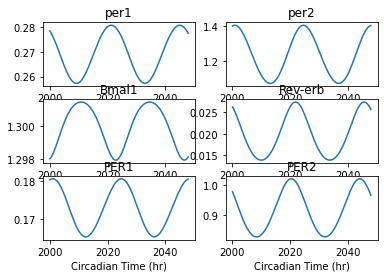

In [40]:
fig,axes=plt.subplots(3,2)
axes[0,0].plot(t[200000:204800],y[200000:204800,0])
axes[0,0].set_title('per1')
axes[0,1].plot(t[200000:204800],y[200000:204800,3])
axes[0,1].set_title('per2')
axes[1,0].plot(t[200000:204800],y[200000:204800,6])
axes[1,0].set_title('Bmal1')
axes[1,1].plot(t[200000:204800],y[200000:204800,9])
axes[1,1].set_title('Rev-erb')
axes[2,0].plot(t[200000:204800],y[200000:204800,2])
axes[2,0].set_title('PER1')
axes[2,1].plot(t[200000:204800],y[200000:204800,8])
axes[2,1].set_title('PER2')

for ax in axes.flat:
    ax.set(xlabel='Circadian Time (hr)')